# Project: Analyzing Health Data and Sleep Quality


## Get Data

In [ ]:
!pip install opendatasets
import opendatasets as od
import pandas as pd

#need to type in login when prompted
from google.colab import userdata
userdata.get('Kaggle_user')

from google.colab import userdata
userdata.get('Kaggle')


od.download("https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset")

Skipping, found downloaded files in "./sleep-health-and-lifestyle-dataset" (use force=True to force download)


In [ ]:
file =('sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

health_data = pd.read_csv('sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')
health_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


##Visualize Relationships

In [ ]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


<Axes: xlabel='Daily Steps', ylabel='Quality of Sleep'>

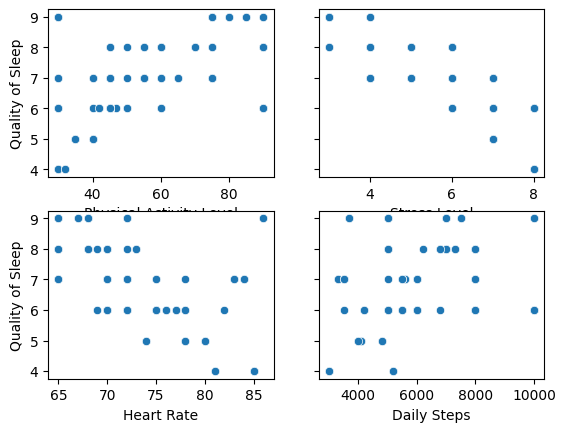

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey=True, sharex=False, squeeze=False)


sns.scatterplot(y="Quality of Sleep", x="Physical Activity Level", data=health_data,ax=ax1)
sns.scatterplot(y="Quality of Sleep", x="Stress Level", data=health_data, ax=ax2)

sns.scatterplot(y="Quality of Sleep", x="Heart Rate", data=health_data, ax=ax3)
sns.scatterplot(y="Quality of Sleep", x="Daily Steps", data=health_data, ax=ax4)


<Axes: xlabel='Sleep Disorder', ylabel='Quality of Sleep'>

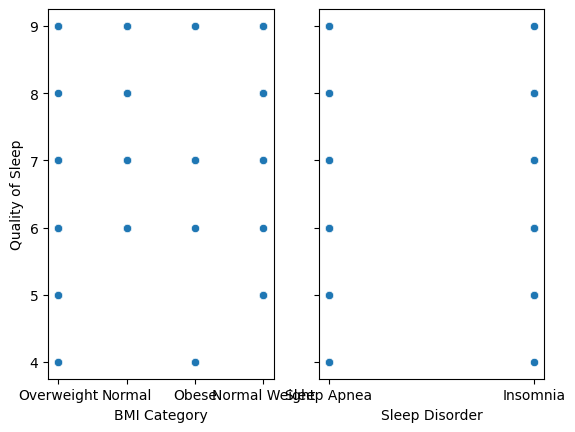

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)

sns.scatterplot(y="Quality of Sleep", x="BMI Category", data=health_data,ax=ax1)
sns.scatterplot(y="Quality of Sleep", x="Sleep Disorder", data=health_data, ax=ax2)

<Axes: xlabel='Daily Steps', ylabel='Physical Activity Level'>

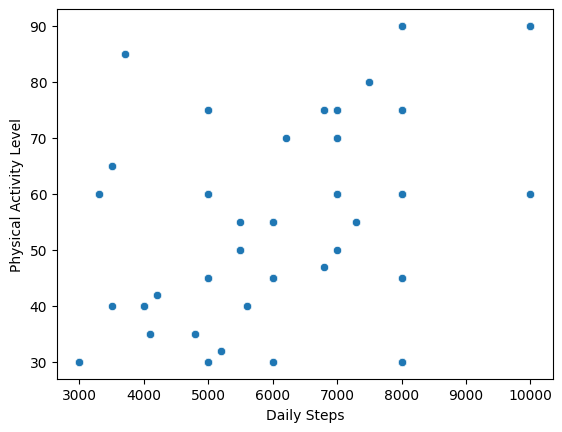

In [ ]:
sns.scatterplot(x="Daily Steps", y="Physical Activity Level", data=health_data)

<Axes: xlabel='Sleep Duration', ylabel='Quality of Sleep'>

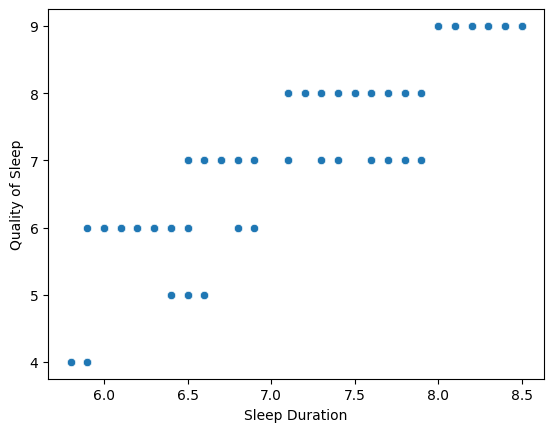

In [ ]:
sns.scatterplot(y="Quality of Sleep", x="Sleep Duration", data=health_data)

## Clean Data and Regression

In [ ]:
#Want to see the impact of physical activity on sleep, controlling for stress and daily steps
#Daily steps may be more reflective, as it may encompass more sustained activity throughout the whole day
#instead of working out for an hour and then sitting at a desk all day

In [ ]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
cleaned_health_data = health_data[["Quality of Sleep","Physical Activity Level","Stress Level","Daily Steps","Sleep Duration","Gender","BMI Category"]].dropna()
cleaned_health_data = pd.get_dummies(cleaned_health_data, columns=["Gender", "BMI Category"],dtype=int)
cleaned_health_data.head()


,Quality of Sleep,Physical Activity Level,Stress Level,Daily Steps,Sleep Duration,Gender_Female,Gender_Male,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,6,42,6,4200,6.1,0,1,0,0,0,1
1,6,60,8,10000,6.2,0,1,1,0,0,0
2,6,60,8,10000,6.2,0,1,1,0,0,0
3,4,30,8,3000,5.9,0,1,0,0,1,0
4,4,30,8,3000,5.9,0,1,0,0,1,0


In [ ]:
x=cleaned_health_data["Stress Level"]
x=sm.add_constant(x)
y=cleaned_health_data["Quality of Sleep"]
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1563.
Date:                Sun, 05 May 2024   Prob (F-statistic):          2.88e-135
Time:                        22:44:48   Log-Likelihood:                -289.06
No. Observations:                 374   AIC:                             582.1
Df Residuals:                     372   BIC:                             590.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.5774      0.087    121.678   

In [ ]:
x=cleaned_health_data["Physical Activity Level"]
x=sm.add_constant(x)
y=cleaned_health_data["Quality of Sleep"]
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     14.38
Date:                Sun, 05 May 2024   Prob (F-statistic):           0.000175
Time:                        22:44:54   Log-Likelihood:                -590.33
No. Observations:                 374   AIC:                             1185.
Df Residuals:                     372   BIC:                             1193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
x=cleaned_health_data["Daily Steps"]
x=sm.add_constant(x)
y=cleaned_health_data["Quality of Sleep"]
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1049
Date:                Sun, 05 May 2024   Prob (F-statistic):              0.746
Time:                        22:47:50   Log-Likelihood:                -597.37
No. Observations:                 374   AIC:                             1199.
Df Residuals:                     372   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.2282      0.269     26.902      

In [ ]:
x=cleaned_health_data.drop("Quality of Sleep", axis=1)
x=sm.add_constant(x)
x

,const,Physical Activity Level,Stress Level,Daily Steps,Sleep Duration,Gender_Female,Gender_Male,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1.0,42,6,4200,6.1,0,1,0,0,0,1
1,1.0,60,8,10000,6.2,0,1,1,0,0,0
2,1.0,60,8,10000,6.2,0,1,1,0,0,0
3,1.0,30,8,3000,5.9,0,1,0,0,1,0
4,1.0,30,8,3000,5.9,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
369,1.0,75,3,7000,8.1,1,0,0,0,0,1
370,1.0,75,3,7000,8.0,1,0,0,0,0,1
371,1.0,75,3,7000,8.1,1,0,0,0,0,1
372,1.0,75,3,7000,8.1,1,0,0,0,0,1


In [ ]:
y = cleaned_health_data["Quality of Sleep"]

In [ ]:
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     431.0
Date:                Sun, 05 May 2024   Prob (F-statistic):          8.39e-181
Time:                        22:45:32   Log-Likelihood:                -158.66
No. Observations:                 374   AIC:                             335.3
Df Residuals:                     365   BIC:                             370.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##Predicitve Model

In [ ]:
cleaned_health_data["Quality of Sleep"].value_counts()

Quality of Sleep
8    109
6    105
7     77
9     71
5      7
4      5
Name: count, dtype: int64

In [ ]:
negative_labels = cleaned_health_data[cleaned_health_data["Quality of Sleep"].astype(int) <= 6]
num_negative_labels = negative_labels.shape[0]
num_negative_labels

117

In [ ]:
negative_labels.shape

(117, 11)

In [ ]:
positive_labels = cleaned_health_data[cleaned_health_data["Quality of Sleep"].astype(int) > 6].sample(num_negative_labels)
positive_labels.shape


(117, 11)

In [ ]:
negative_labels['Quality of Sleep'].value_counts()

Quality of Sleep
6    105
5      7
4      5
Name: count, dtype: int64

In [ ]:
#Creating binary set of data Quality of sleep =1 for positive and 0 for negative

I was trying to run this without making the sleeo quality binary and was having issues with the model, in particular the roc_auc was not working

In [ ]:
positive_labels['Quality of Sleep'] = positive_labels['Quality of Sleep'].map({9:1,8:1,7:1})
negative_labels['Quality of Sleep'] = negative_labels['Quality of Sleep'].map({6:0,5:0,4:0})


<ipython-input-203-0e3f3ef7ccd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_labels['Quality of Sleep'] = negative_labels['Quality of Sleep'].map({6:0,5:0,4:0})


In [ ]:
combined_data = pd.concat([negative_labels, positive_labels])
combined_data.head()

,Quality of Sleep,Physical Activity Level,Stress Level,Daily Steps,Sleep Duration,Gender_Female,Gender_Male,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,0,42,6,4200,6.1,0,1,0,0,0,1
1,0,60,8,10000,6.2,0,1,1,0,0,0
2,0,60,8,10000,6.2,0,1,1,0,0,0
3,0,30,8,3000,5.9,0,1,0,0,1,0
4,0,30,8,3000,5.9,0,1,0,0,1,0


In [ ]:
combined_data['Quality of Sleep'].value_counts()

Quality of Sleep
0    117
1    117
Name: count, dtype: int64

In [ ]:
y = combined_data.pop('Quality of Sleep')
x = combined_data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
x_train.head()

,Physical Activity Level,Stress Level,Daily Steps,Sleep Duration,Gender_Female,Gender_Male,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
302,55,6,6000,7.1,1,0,0,1,0,0
57,30,8,5000,6.0,0,1,1,0,0,0
99,60,4,7000,7.1,1,0,1,0,0,0
227,45,7,6000,6.3,0,1,0,0,0,1
6,40,7,3500,6.3,0,1,0,0,1,0


In [ ]:
# fit a model
clf = LogisticRegression(penalty='l2').fit(x_train, y_train)
# predict probabilities
predictions = clf.predict_proba(x_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  method="L-BFGS-B",


In [ ]:
y_pred = clf.predict_proba(x_test)
y_pred

array([[4.90242117e-03, 9.95097579e-01],
       [9.32505360e-01, 6.74946402e-02],
       [1.04825000e-01, 8.95175000e-01],
       [2.06826611e-02, 9.79317339e-01],
       [4.27522731e-02, 9.57247727e-01],
       [9.75766705e-01, 2.42332948e-02],
       [4.27522731e-02, 9.57247727e-01],
       [3.65316422e-05, 9.99963468e-01],
       [4.12973469e-05, 9.99958703e-01],
       [4.90242117e-03, 9.95097579e-01],
       [8.23557484e-04, 9.99176443e-01],
       [3.43532859e-03, 9.96564671e-01],
       [5.72054753e-01, 4.27945247e-01],
       [9.19884366e-01, 8.01156339e-02],
       [4.62933229e-01, 5.37066771e-01],
       [9.90802980e-04, 9.99009197e-01],
       [6.87831252e-03, 9.93121687e-01],
       [9.32505360e-01, 6.74946402e-02],
       [1.16306186e-05, 9.99988369e-01],
       [9.75766705e-01, 2.42332948e-02],
       [9.85653812e-01, 1.43461875e-02],
       [8.23557484e-04, 9.99176443e-01],
       [9.97960139e-01, 2.03986052e-03],
       [1.39948379e-05, 9.99986005e-01],
       [9.709835

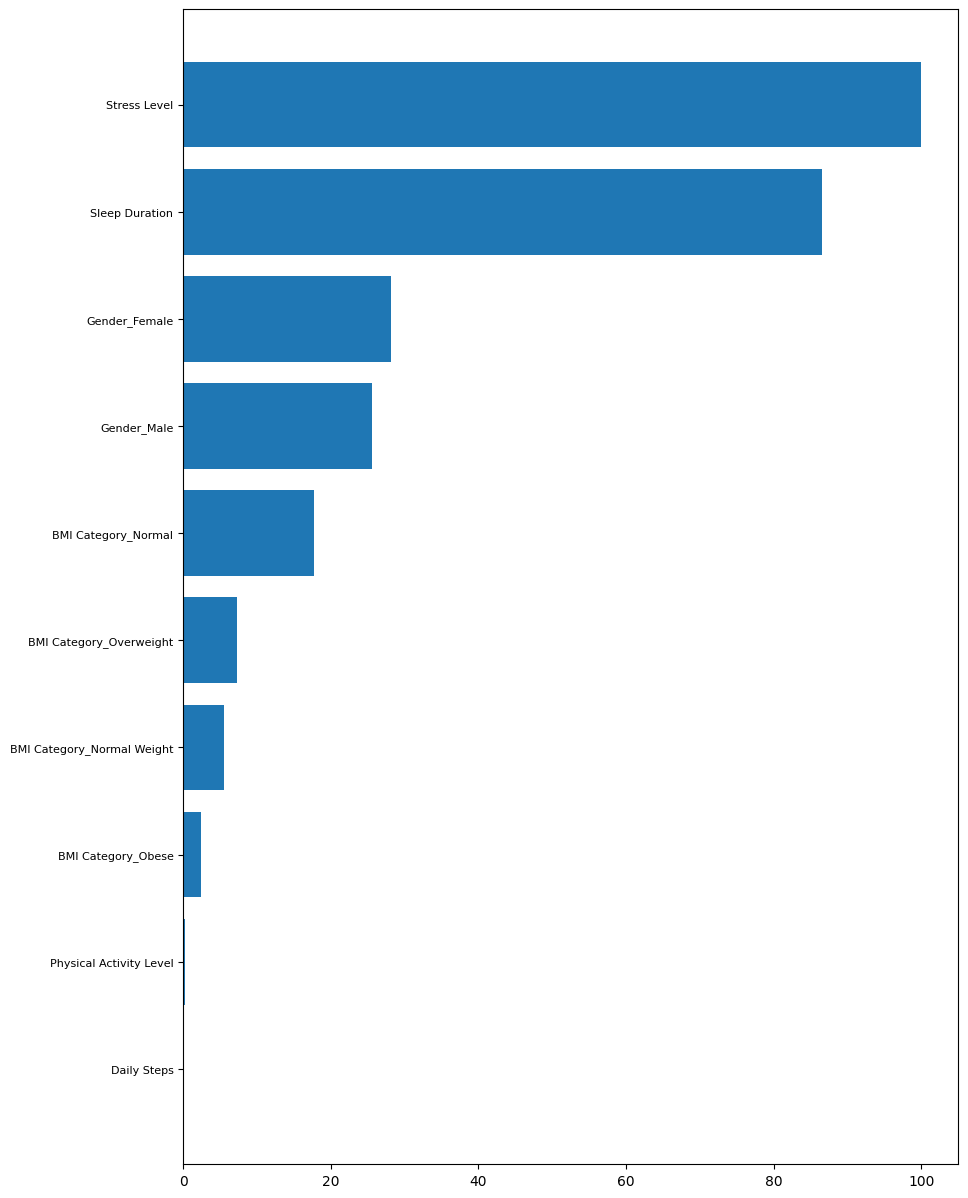

In [ ]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10, 15))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

plt.show()

In [ ]:
df_confusion = pd.crosstab(y_pred.round()[:,1], y_test, rownames=['Predicted'], colnames=['Actual'], margins=True)
df_confusion

Actual,0,1,All
Predicted,,,
0.0,28,0,28
1.0,1,30,31
All,29,30,59


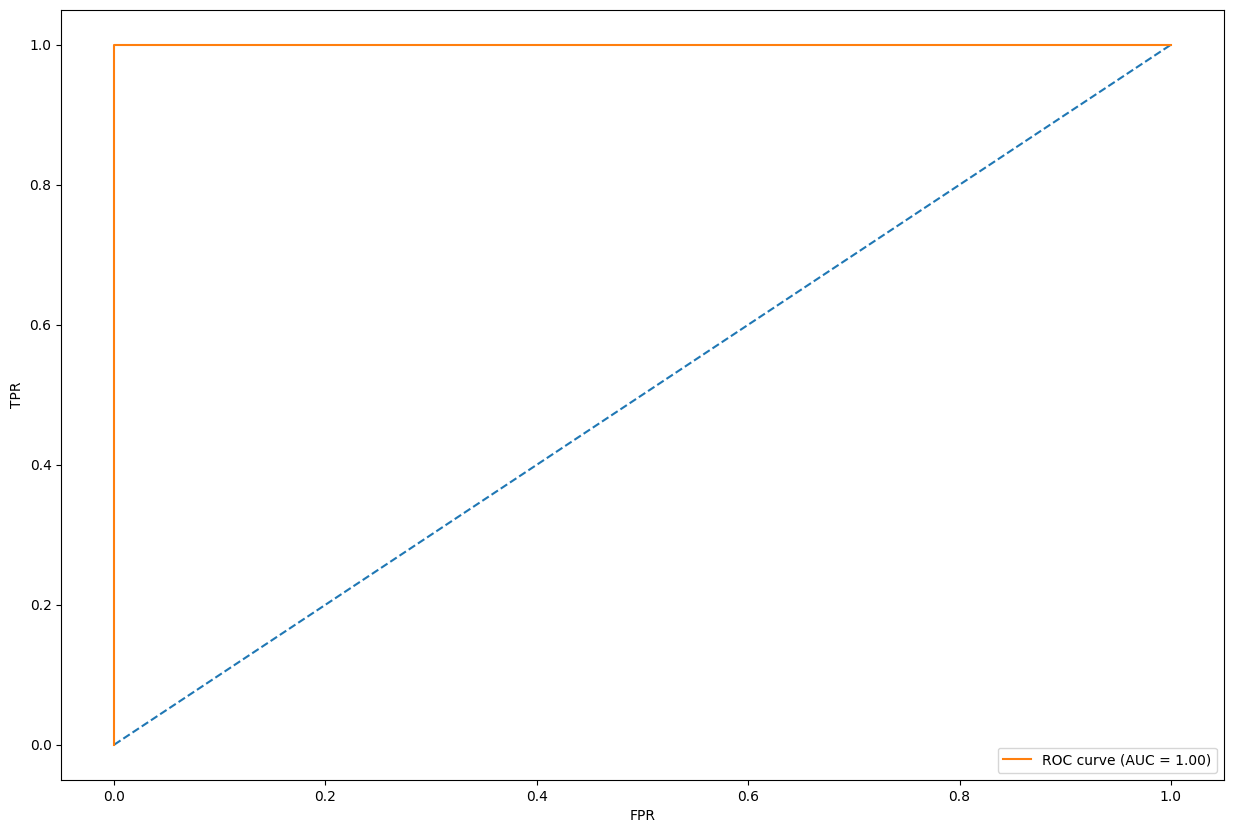

In [ ]:
# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(15, 10))
# plot horizontal line
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()